In [2]:
import numpy as np
import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv("../IRIS.csv")
#extracting unique species
types = pd.unique(raw_data["species"])

idx = [i for i in range(len(types))]
data = raw_data.copy()
data["species"].replace(types,idx,inplace=True)

In [4]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [9]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.x_train = None
        self.y_train = None
        self.x_mean = None
        self.components = None
    
    def fit(self,X):
        m, n = X.shape
        self.x_mean = np.mean(X, axis=0)
        B = X - self.x_mean

        C = np.cov(B.T)

        eig_vect, eig_vals = np.linalg.eig(C)
        eig_vect = eig_vect.T
        
        idxs = np.argsort(eig_vals)[::-1]
        
        eig_vals = eig_vals[idxs]
        eig_vect = eig_vect[idxs]
        
        self.components = eig_vect[:self.n_components]
    
    def transform(self, X):
        
        X -= self.x_mean
        return np.dot(X, self.components.T)

In [10]:
pca = PCA(2)
pca.fit(X)

In [11]:
proj = pca.transform(X)

In [13]:
x1,x2 = proj[:,0], proj[:,1]

/var/folders/8d/_qvnmytd6zz84kf27_g6dw940000gn/T/ipykernel_1141/1819110437.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=Y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))


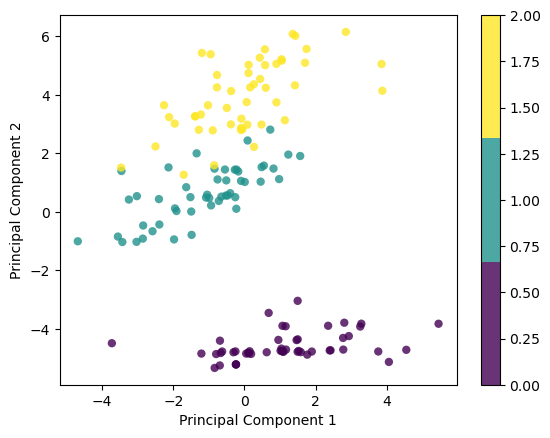

In [18]:
plt.scatter(x1, x2, c=Y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()